In [1]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [2]:
worksheet = gc.open('eFEDS_VLASS_Simbad').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()

index = [i[0] for i in rows[1:]]
adjusted_rows = [i[1:] for i in rows[1:]]

import pandas as pd
df = pd.DataFrame.from_records(adjusted_rows, columns=rows[0][1:], index=index)

df.head()

,ERO_RA_CORR,ERO_DEC_CORR,ERO_ML_FLUX,CTP_LS8_RA,CTP_LS8_DEC,CTP_quality,GaiaEDR3_parallax,GaiaEDR3_parallax_error,GaiaEDR3_pmra,GaiaEDR3_pmra_error,...,LS8_r,LS8_r_ERR,LS8_z,LS8_z_ERR,SPECZ_REDSHIFT,CTP_Classification,Total_flux,E_Total_flux,nbref,main_type
eFEDS J093700.9+010545,144.2538329,1.095920409,6.21E-12,144.2543591,1.095466302,4,-0.0712,0.0514,0.018,0.051,...,15.393069,4.24E-04,15.463301,4.89E-04,0.050684266,SECURE EXTRAGALACTIC,,,137,Seyfert_1
eFEDS J091453.4+042636,138.7228791,4.44338404,4.42E-12,138.7232072,4.442907678,4,55.9338,0.1607,-75.445,0.161,...,11.818934,0.0015543416,14.762686,0.018857492,,SECURE GALACTIC,,,83,SB*
eFEDS J085617.8-013805,134.0741705,-1.634745037,3.99E-12,134.0742909,-1.635378822,4,0.0241,0.1252,-0.077,0.153,...,15.390414,5.90E-04,14.928375,6.54E-04,0.05967131,SECURE EXTRAGALACTIC,,,26,Seyfert_1
eFEDS J084025.4+033302,130.1060962,3.55080893,3.09E-12,130.1063009,3.550497349,4,-0.0112,0.1106,0.041,0.108,...,16.7818,8.57E-04,16.917795,8.82E-04,0.060387,SECURE EXTRAGALACTIC,,,22,Seyfert_1
eFEDS J091639.7+004343,139.1654354,0.7287895713,2.03E-12,139.1645801,0.7274794535,2,,,,,...,16.775991,0.0011824907,16.449928,9.68E-04,,LIKELY GALACTIC,,,,


In [3]:
df.describe().transpose()

,count,unique,top,freq
ERO_RA_CORR,27369,27365,129.575849,2
ERO_DEC_CORR,27369,27369,1.095920409,1
ERO_ML_FLUX,27369,1656,1.02E-14,256
CTP_LS8_RA,27369,27366,141.3231013,2
CTP_LS8_DEC,27369,27366,4.589785425,2
CTP_quality,27369,5,4,20873
GaiaEDR3_parallax,27369,7827,,18609
GaiaEDR3_parallax_error,27369,5904,,18609
GaiaEDR3_pmra,27369,5175,,18609
GaiaEDR3_pmra_error,27369,1977,,18609


In [ ]:
df.shape

(27369, 42)

In [ ]:
import numpy as np
df = df.replace('',np.nan)

In [ ]:
df.isnull().sum()

ERO_RA_CORR                    0
ERO_DEC_CORR                   0
ERO_ML_FLUX                    0
CTP_LS8_RA                     0
CTP_LS8_DEC                    0
CTP_quality                    0
GaiaEDR3_parallax          18609
GaiaEDR3_parallax_error    18609
GaiaEDR3_pmra              18609
GaiaEDR3_pmra_error        18609
GaiaEDR3_pmdec             18609
GaiaEDR3_pmdec_error       18609
FUV                        25136
FUV_ERR                    25136
NUV                        21579
NUV_ERR                    21579
VISTA_J                    14828
VISTA_J_ERR                14828
VISTA_H                    14861
VISTA_H_ERR                14861
VISTA_Ks                   14838
VISTA_Ks_ERR               14838
W1                           120
W1_ERR                       120
W2                           162
W2_ERR                       162
W3                          5688
W3_ERR                      5688
W4                         10021
W4_ERR                     10021
LS8_g     

In [ ]:
df[df.columns[:-5]] = df[df.columns[:-5]].apply(pd.to_numeric)
df[df.columns[-4:-1]] = df[df.columns[-4:-1]].apply(pd.to_numeric)
df.dtypes

ERO_RA_CORR                float64
ERO_DEC_CORR               float64
ERO_ML_FLUX                float64
CTP_LS8_RA                 float64
CTP_LS8_DEC                float64
CTP_quality                  int64
GaiaEDR3_parallax          float64
GaiaEDR3_parallax_error    float64
GaiaEDR3_pmra              float64
GaiaEDR3_pmra_error        float64
GaiaEDR3_pmdec             float64
GaiaEDR3_pmdec_error       float64
FUV                        float64
FUV_ERR                    float64
NUV                        float64
NUV_ERR                    float64
VISTA_J                    float64
VISTA_J_ERR                float64
VISTA_H                    float64
VISTA_H_ERR                float64
VISTA_Ks                   float64
VISTA_Ks_ERR               float64
W1                         float64
W1_ERR                     float64
W2                         float64
W2_ERR                     float64
W3                         float64
W3_ERR                     float64
W4                  

In [ ]:
df = df[df.CTP_quality>2]
df.head()

,ERO_RA_CORR,ERO_DEC_CORR,ERO_ML_FLUX,CTP_LS8_RA,CTP_LS8_DEC,CTP_quality,GaiaEDR3_parallax,GaiaEDR3_parallax_error,GaiaEDR3_pmra,GaiaEDR3_pmra_error,...,LS8_r,LS8_r_ERR,LS8_z,LS8_z_ERR,SPECZ_REDSHIFT,CTP_Classification,Total_flux,E_Total_flux,nbref,main_type
eFEDS J093700.9+010545,144.253833,1.095920,6.210000e-12,144.254359,1.095466,4,-0.0712,0.0514,0.018,0.051,...,15.393069,0.000424,15.463301,0.000489,0.050684,SECURE EXTRAGALACTIC,NaN,NaN,137.0,Seyfert_1
eFEDS J091453.4+042636,138.722879,4.443384,4.420000e-12,138.723207,4.442908,4,55.9338,0.1607,-75.445,0.161,...,11.818934,0.001554,14.762686,0.018857,NaN,SECURE GALACTIC,NaN,NaN,83.0,SB*
eFEDS J085617.8-013805,134.074171,-1.634745,3.990000e-12,134.074291,-1.635379,4,0.0241,0.1252,-0.077,0.153,...,15.390414,0.000590,14.928375,0.000654,0.059671,SECURE EXTRAGALACTIC,NaN,NaN,26.0,Seyfert_1
eFEDS J084025.4+033302,130.106096,3.550809,3.090000e-12,130.106301,3.550497,4,-0.0112,0.1106,0.041,0.108,...,16.781800,0.000857,16.917795,0.000882,0.060387,SECURE EXTRAGALACTIC,NaN,NaN,22.0,Seyfert_1
eFEDS J084441.9+004416,131.174734,0.737925,1.890000e-12,131.175092,0.737720,4,15.3973,0.0135,-108.139,0.016,...,10.091446,0.000401,12.566205,0.001924,NaN,SECURE GALACTIC,NaN,NaN,7.0,PM*


In [ ]:
df.shape

(22256, 42)

In [ ]:
def is_AGN(classification, ref):
  value = "Unknown"
  try:
    if classification in ["QSO", "Seyfert_1", "Seyfert_2", "BLLac", "Blazar", "RadioG", "AGN"] and ref>=3:
      return True
    elif pd.isna(classification):
      return value
    elif ref<3 or "Candidate" in classification:
      return value
    else:
      return False
  except Exception as e:
    print(e)
    print(classification, ref)
    input()

df["is_AGN"] = df.apply(lambda x: is_AGN(x.main_type, x.nbref), axis=1)
df.is_AGN.value_counts()

Unknown    18856
True        2726
False        674
Name: is_AGN, dtype: int64

In [ ]:
df.main_type.unique()

array(['Seyfert_1', 'SB*', 'PM*', 'QSO', nan, 'Blazar', 'RotV*', 'RSCVn',
       'Star', 'Galaxy', 'BLLac', 'V*', 'LINER', 'BClG', 'AGN_Candidate',
       'GinCl', 'LPV*', '**', 'EB*', 'AGN', 'QSO_Candidate', 'Seyfert_2',
       'Radio', 'Blue', 'X', 'CataclyV*', 'RadioG', 'CV*_Candidate',
       'YSO_Candidate', 'Em*', 'EB*_Candidate', 'LensedImage', 'GinGroup',
       'Blazar_Candidate', 'PulsV*', 'Pec*', 'WD*_Candidate', 'ClG',
       'Radio(cm)', 'EllipVar', 'Seyfert', 'UV', 'EmG', 'low-mass*',
       'PairG', 'G_Candidate', 'GravLensSystem', 'RGB*',
       'Planet?_Candidate', 'WD*', 'brownD*_Candidate', 'LP*_Candidate'],
      dtype=object)

In [ ]:
df = df[(abs(df["GaiaEDR3_parallax"]/df["GaiaEDR3_parallax_error"])<=3) | (df["GaiaEDR3_parallax"].isnull())]
df.shape

(20255, 43)

In [ ]:
df = df[(abs(df.GaiaEDR3_pmra/df.GaiaEDR3_pmra_error)<=3) | df.GaiaEDR3_pmra.isnull()]
df.shape

(20139, 43)

In [ ]:
df = df[(abs(df.GaiaEDR3_pmdec/df.GaiaEDR3_pmdec_error)<=3) | df.GaiaEDR3_pmdec.isnull()]
df.shape

(20086, 43)

In [ ]:
df.isnull().sum()

ERO_RA_CORR                    0
ERO_DEC_CORR                   0
ERO_ML_FLUX                    0
CTP_LS8_RA                     0
CTP_LS8_DEC                    0
CTP_quality                    0
GaiaEDR3_parallax          14261
GaiaEDR3_parallax_error    14261
GaiaEDR3_pmra              14261
GaiaEDR3_pmra_error        14261
GaiaEDR3_pmdec             14261
GaiaEDR3_pmdec_error       14261
FUV                        18272
FUV_ERR                    18272
NUV                        15519
NUV_ERR                    15519
VISTA_J                    10703
VISTA_J_ERR                10703
VISTA_H                    10714
VISTA_H_ERR                10714
VISTA_Ks                   10705
VISTA_Ks_ERR               10705
W1                            17
W1_ERR                        17
W2                             3
W2_ERR                         3
W3                          3618
W3_ERR                      3618
W4                          6926
W4_ERR                      6926
LS8_g     

In [ ]:
df.is_AGN.value_counts()

Unknown    16971
True        2691
False        424
Name: is_AGN, dtype: int64

[None]

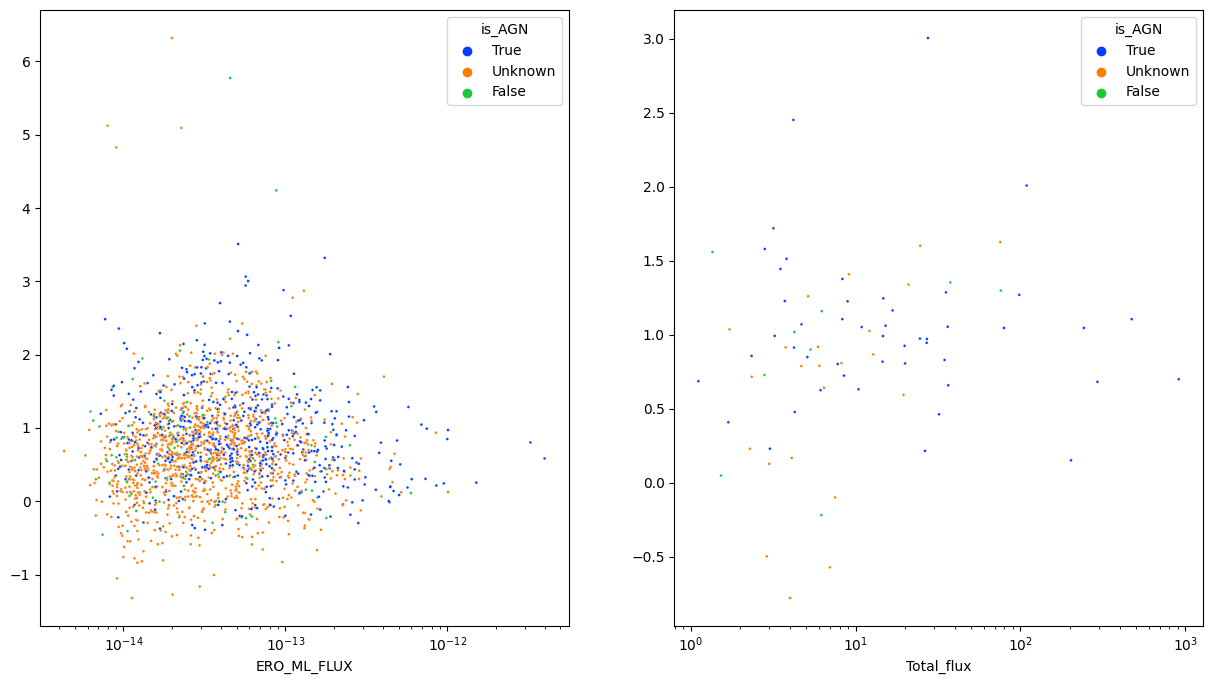

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax =plt.subplots(1,2, figsize = (15,8))
plot1 = sns.scatterplot(x=df["ERO_ML_FLUX"], y = (df["FUV"]-df["NUV"]), hue=df["is_AGN"], palette="bright", ax=ax[0], s=4)
plot2 = sns.scatterplot(x=df["Total_flux"], y = (df["FUV"]-df["NUV"]), hue=df["is_AGN"], palette="bright", ax=ax[1], s=4)
plot1.set(xscale="log")
plot2.set(xscale="log")

<ipython-input-18-3a730fdadbf0>:2: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  plot1 = sns.scatterplot(x=df["ERO_ML_FLUX"], y = (df["W2"]-df["W1"]), hue=df["is_AGN"].apply(lambda x: True if x==True else False), palette=sns.color_palette("bright", as_cmap=True), ax=ax[0], s=4)
<ipython-input-18-3a730fdadbf0>:3: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  plot2 = sns.scatterplot(x=df["Total_flux"], y = (df["W1"]-df["W2"]), hue=df["is_AGN"].apply(lambda x: True if x==True else False), palette=sns.color_palette("bright", as_cmap=True), ax=ax[1], s=4)


[None]

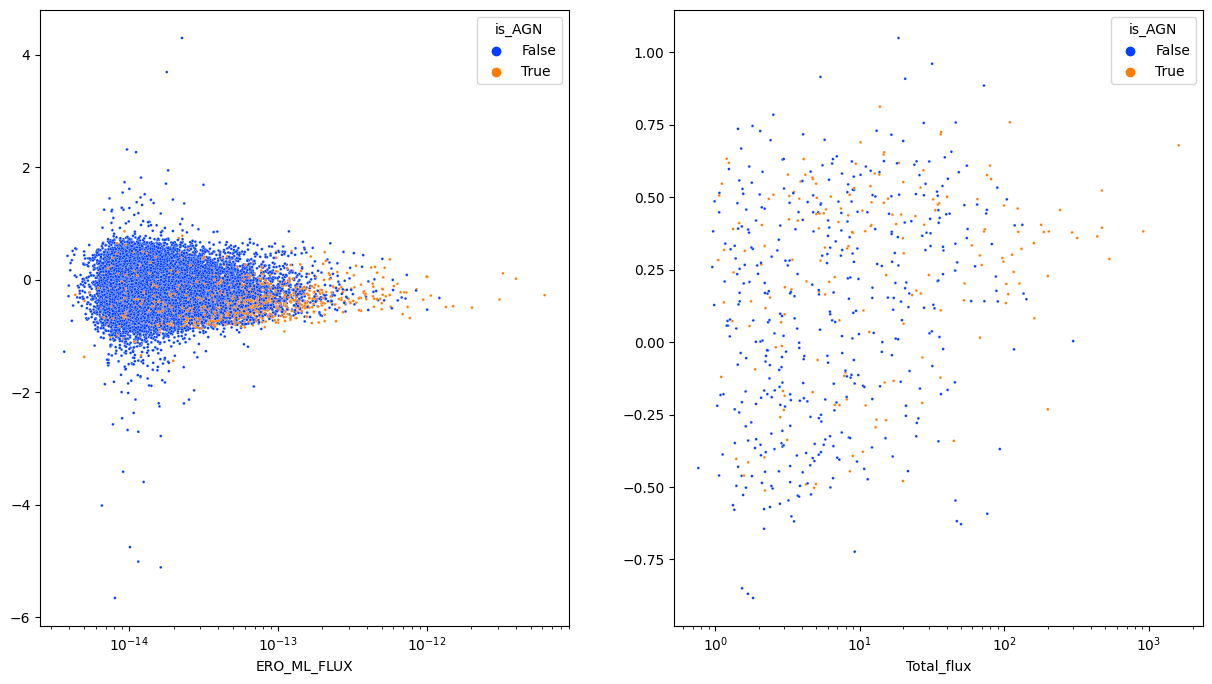

In [ ]:
fig, ax =plt.subplots(1,2, figsize = (15,8))
plot1 = sns.scatterplot(x=df["ERO_ML_FLUX"], y = (df["W2"]-df["W1"]), hue=df["is_AGN"].apply(lambda x: True if x==True else False), palette=sns.color_palette("bright", as_cmap=True), ax=ax[0], s=4)
plot2 = sns.scatterplot(x=df["Total_flux"], y = (df["W1"]-df["W2"]), hue=df["is_AGN"].apply(lambda x: True if x==True else False), palette=sns.color_palette("bright", as_cmap=True), ax=ax[1], s=4)
plot1.set(xscale="log")
plot2.set(xscale="log")

<ipython-input-19-3aa8bfafbffb>:2: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  plot1 = sns.scatterplot(x=df["ERO_ML_FLUX"], y = (df["LS8_g"]-df["LS8_r"]), hue=df["is_AGN"].apply(lambda x: True if x==True else False), palette=sns.color_palette("bright", as_cmap=True), ax=ax[0], s=4)
<ipython-input-19-3aa8bfafbffb>:3: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  plot2 = sns.scatterplot(x=df["Total_flux"], y = (df["LS8_g"]-df["LS8_r"]), hue=df["is_AGN"].apply(lambda x: True if x==True else False), palette=sns.color_palette("bright", as_cmap=True), ax=ax[1], s=4)


[None]

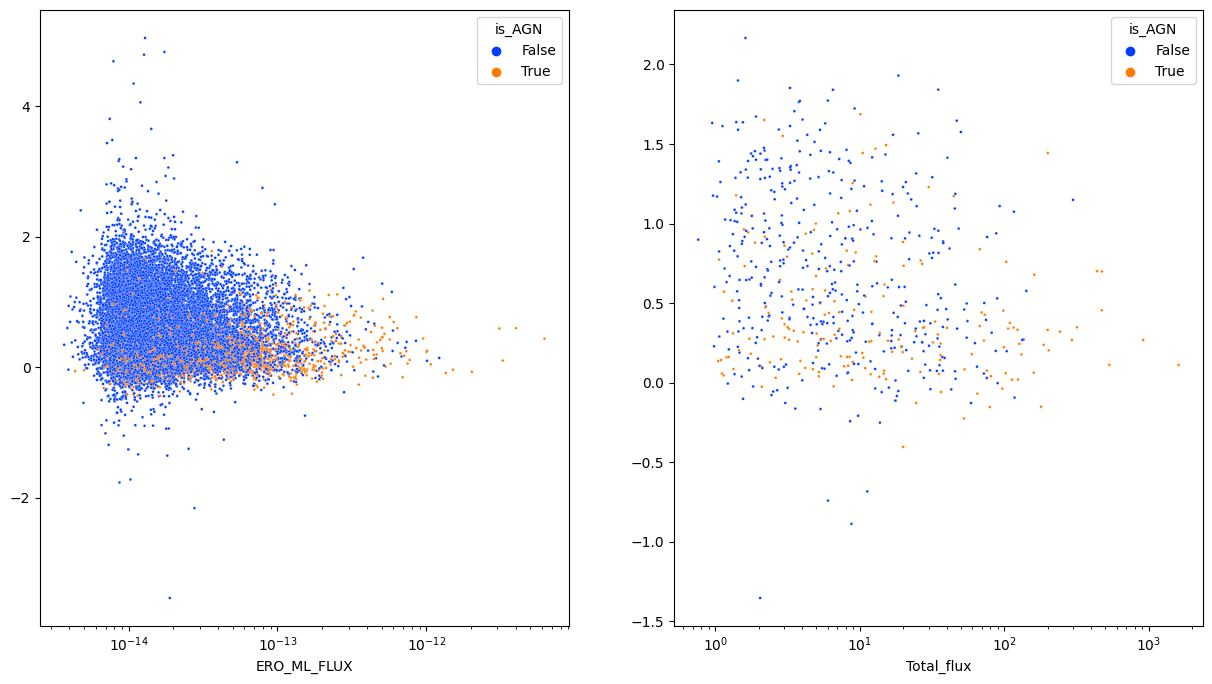

In [ ]:
fig, ax =plt.subplots(1,2, figsize = (15,8))
plot1 = sns.scatterplot(x=df["ERO_ML_FLUX"], y = (df["LS8_g"]-df["LS8_r"]), hue=df["is_AGN"].apply(lambda x: True if x==True else False), palette=sns.color_palette("bright", as_cmap=True), ax=ax[0], s=4)
plot2 = sns.scatterplot(x=df["Total_flux"], y = (df["LS8_g"]-df["LS8_r"]), hue=df["is_AGN"].apply(lambda x: True if x==True else False), palette=sns.color_palette("bright", as_cmap=True), ax=ax[1], s=4)
plot1.set(xscale="log")
plot2.set(xscale="log")

<ipython-input-20-3b2b9ca6996a>:2: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  plot1 = sns.scatterplot(x=df["ERO_ML_FLUX"], y = (df["VISTA_J"]-df["VISTA_H"]), hue=df["is_AGN"].apply(lambda x: True if x==True else False), palette=sns.color_palette("bright", as_cmap=True), ax=ax[0], s=4)
<ipython-input-20-3b2b9ca6996a>:3: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  plot2 = sns.scatterplot(x=df["Total_flux"], y = (df["VISTA_J"]-df["VISTA_H"]), hue=df["is_AGN"].apply(lambda x: True if x==True else False), palette=sns.color_palette("bright", as_cmap=True), ax=ax[1], s=4)


[None]

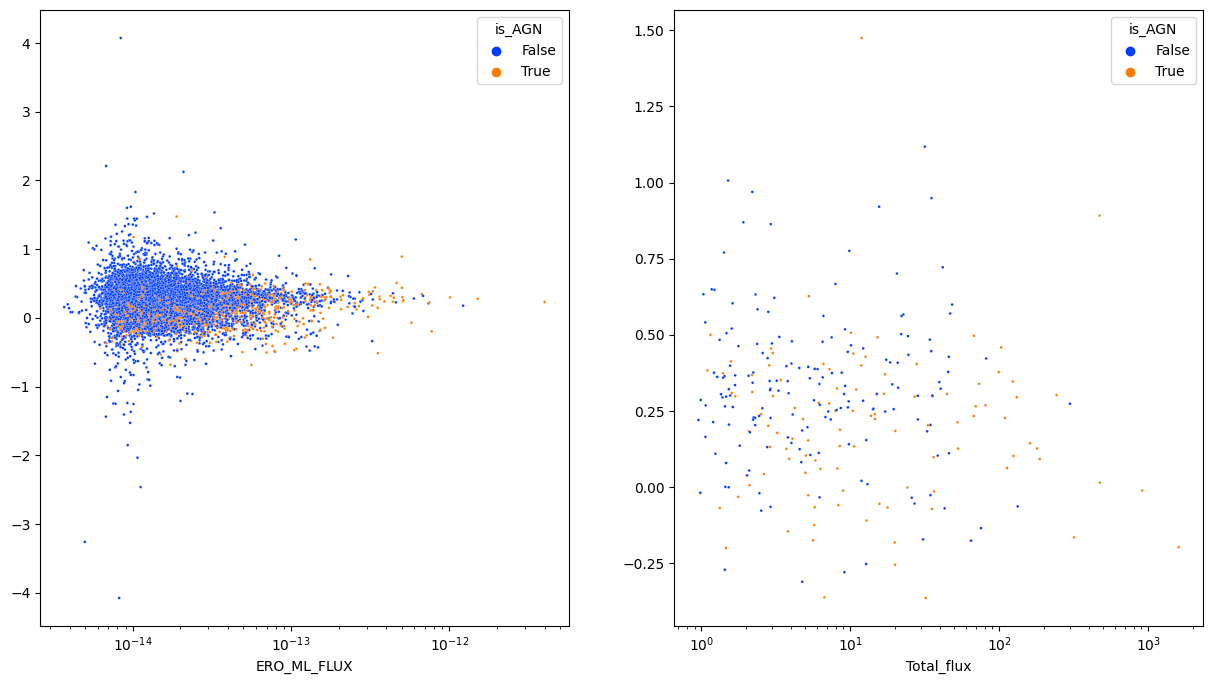

In [ ]:
fig, ax =plt.subplots(1,2, figsize = (15,8))
plot1 = sns.scatterplot(x=df["ERO_ML_FLUX"], y = (df["VISTA_J"]-df["VISTA_H"]), hue=df["is_AGN"].apply(lambda x: True if x==True else False), palette=sns.color_palette("bright", as_cmap=True), ax=ax[0], s=4)
plot2 = sns.scatterplot(x=df["Total_flux"], y = (df["VISTA_J"]-df["VISTA_H"]), hue=df["is_AGN"].apply(lambda x: True if x==True else False), palette=sns.color_palette("bright", as_cmap=True), ax=ax[1], s=4)
plot1.set(xscale="log")
plot2.set(xscale="log")

<ipython-input-21-a3453dd6aa51>:2: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  plot1 = sns.scatterplot(x=df["ERO_ML_FLUX"], y = (df["W1"]-df["W4"]), hue=df["is_AGN"].apply(lambda x: True if x==True else False), palette=sns.color_palette("bright", as_cmap=True), ax=ax[0], s=4)
<ipython-input-21-a3453dd6aa51>:3: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  plot2 = sns.scatterplot(x=df["Total_flux"], y = (df["W1"]-df["W4"]), hue=df["is_AGN"].apply(lambda x: True if x==True else False), palette=sns.color_palette("bright", as_cmap=True), ax=ax[1], s=4)


[None]

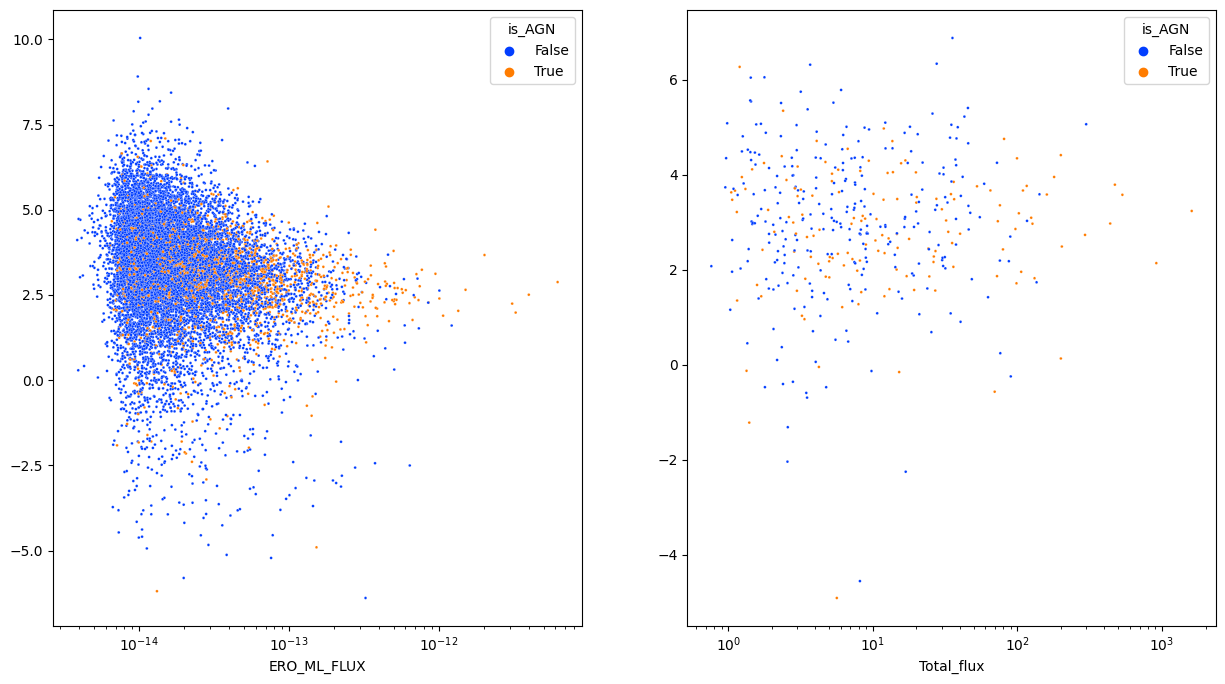

In [ ]:
fig, ax =plt.subplots(1,2, figsize = (15,8))
plot1 = sns.scatterplot(x=df["ERO_ML_FLUX"], y = (df["W1"]-df["W4"]), hue=df["is_AGN"].apply(lambda x: True if x==True else False), palette=sns.color_palette("bright", as_cmap=True), ax=ax[0], s=4)
plot2 = sns.scatterplot(x=df["Total_flux"], y = (df["W1"]-df["W4"]), hue=df["is_AGN"].apply(lambda x: True if x==True else False), palette=sns.color_palette("bright", as_cmap=True), ax=ax[1], s=4)
plot1.set(xscale="log")
plot2.set(xscale="log")

<ipython-input-22-d90b2ed21b0f>:2: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  plot1 = sns.scatterplot(x=df["ERO_ML_FLUX"], y = (df["LS8_g"]-df["LS8_z"]), hue=df["is_AGN"].apply(lambda x: True if x==True else False), palette=sns.color_palette("bright", as_cmap=True), ax=ax[0], s=4)
<ipython-input-22-d90b2ed21b0f>:3: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  plot2 = sns.scatterplot(x=df["Total_flux"], y = (df["LS8_g"]-df["LS8_z"]), hue=df["is_AGN"].apply(lambda x: True if x==True else False), palette=sns.color_palette("bright", as_cmap=True), ax=ax[1], s=4)


[None]

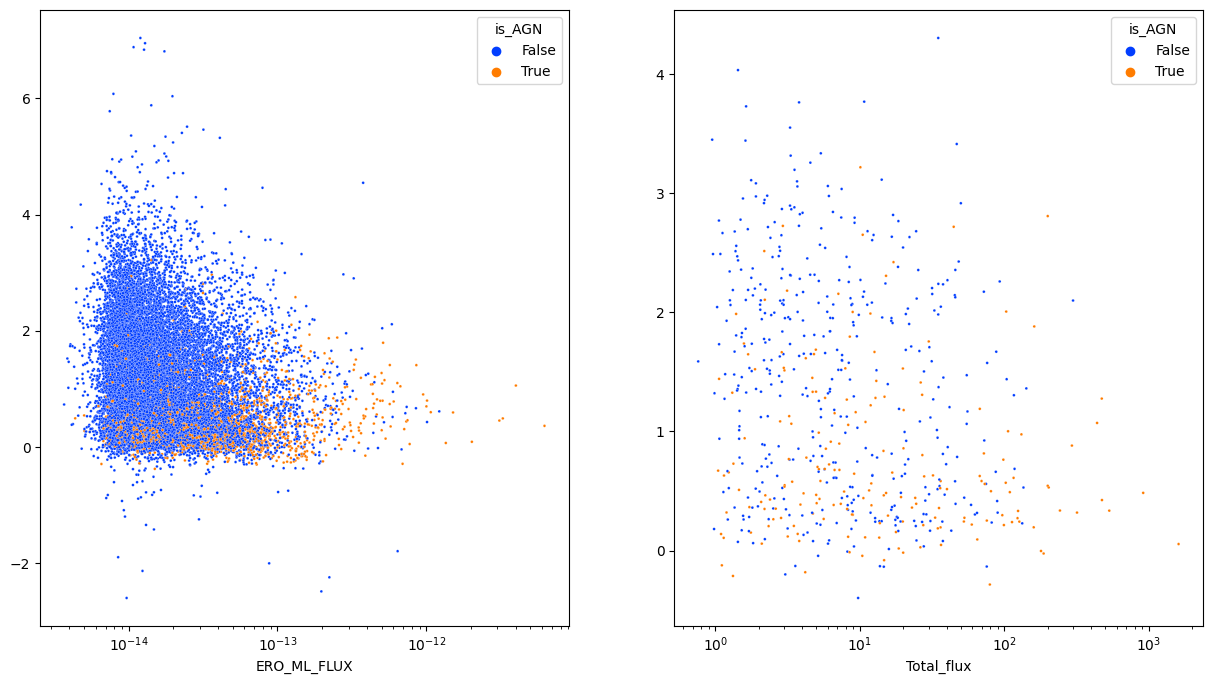

In [ ]:
fig, ax =plt.subplots(1,2, figsize = (15,8))
plot1 = sns.scatterplot(x=df["ERO_ML_FLUX"], y = (df["LS8_g"]-df["LS8_z"]), hue=df["is_AGN"].apply(lambda x: True if x==True else False), palette=sns.color_palette("bright", as_cmap=True), ax=ax[0], s=4)
plot2 = sns.scatterplot(x=df["Total_flux"], y = (df["LS8_g"]-df["LS8_z"]), hue=df["is_AGN"].apply(lambda x: True if x==True else False), palette=sns.color_palette("bright", as_cmap=True), ax=ax[1], s=4)
plot1.set(xscale="log")
plot2.set(xscale="log")

<ipython-input-23-34605d322c89>:2: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  plot1 = sns.scatterplot(x=df["ERO_ML_FLUX"], y = (df["W3"]-df["W2"]), hue=df["is_AGN"].apply(lambda x: True if x==True else False), palette=sns.color_palette("bright", as_cmap=True), ax=ax[0], s=4)
<ipython-input-23-34605d322c89>:3: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  plot2 = sns.scatterplot(x=df["Total_flux"], y = (df["W3"]-df["W2"]), hue=df["is_AGN"].apply(lambda x: True if x==True else False), palette=sns.color_palette("bright", as_cmap=True), ax=ax[1], s=4)


[None]

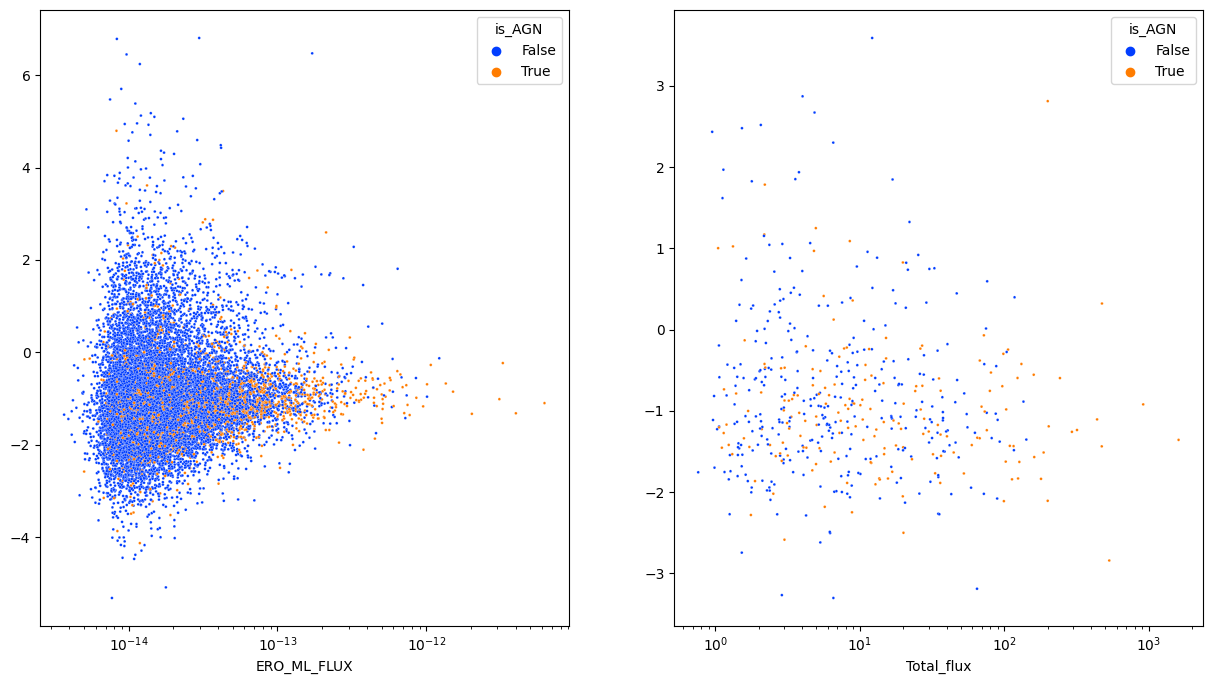

In [ ]:
fig, ax =plt.subplots(1,2, figsize = (15,8))
plot1 = sns.scatterplot(x=df["ERO_ML_FLUX"], y = (df["W3"]-df["W2"]), hue=df["is_AGN"].apply(lambda x: True if x==True else False), palette=sns.color_palette("bright", as_cmap=True), ax=ax[0], s=4)
plot2 = sns.scatterplot(x=df["Total_flux"], y = (df["W3"]-df["W2"]), hue=df["is_AGN"].apply(lambda x: True if x==True else False), palette=sns.color_palette("bright", as_cmap=True), ax=ax[1], s=4)
plot1.set(xscale="log")
plot2.set(xscale="log")

<ipython-input-24-e0f94e58c365>:2: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  plot1 = sns.scatterplot(x=df["ERO_ML_FLUX"], y = (df["VISTA_H"]-df["VISTA_Ks"]), hue=df["is_AGN"].apply(lambda x: True if x==True else False), palette=sns.color_palette("bright", as_cmap=True), ax=ax[0], s=4)
<ipython-input-24-e0f94e58c365>:3: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  plot2 = sns.scatterplot(x=df["Total_flux"], y = (df["VISTA_H"]-df["VISTA_Ks"]), hue=df["is_AGN"].apply(lambda x: True if x==True else False), palette=sns.color_palette("bright", as_cmap=True), ax=ax[1], s=4)


[None]

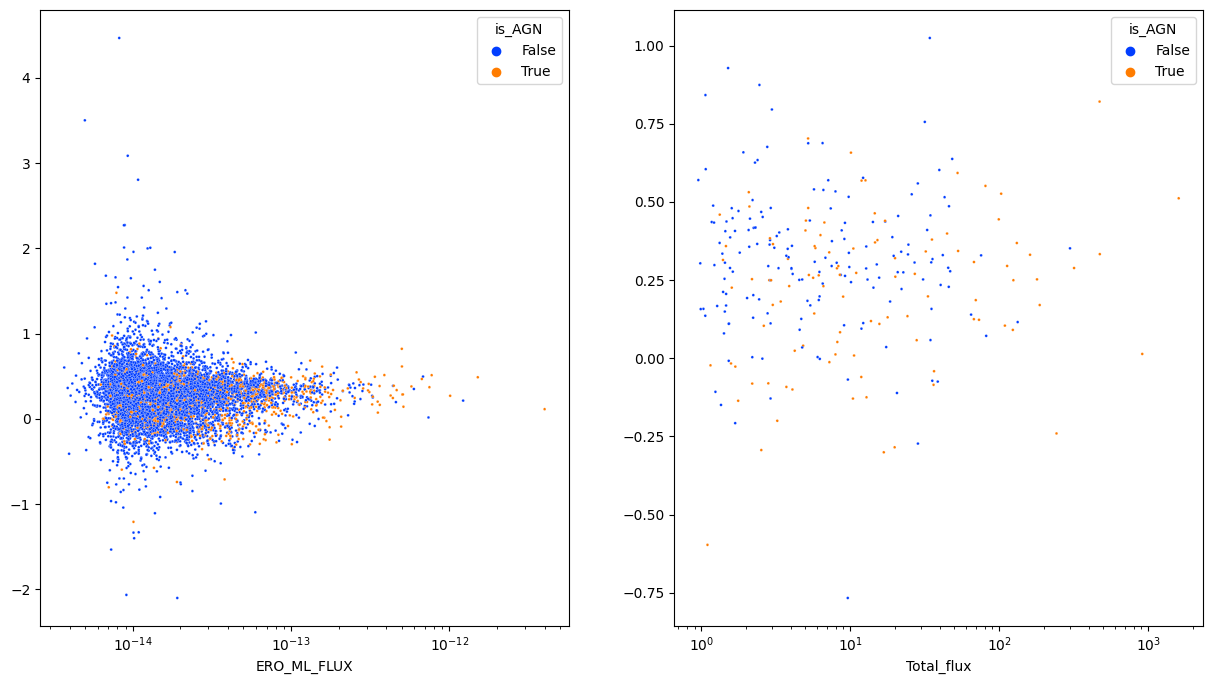

In [ ]:
fig, ax =plt.subplots(1,2, figsize = (15,8))
plot1 = sns.scatterplot(x=df["ERO_ML_FLUX"], y = (df["VISTA_H"]-df["VISTA_Ks"]), hue=df["is_AGN"].apply(lambda x: True if x==True else False), palette=sns.color_palette("bright", as_cmap=True), ax=ax[0], s=4)
plot2 = sns.scatterplot(x=df["Total_flux"], y = (df["VISTA_H"]-df["VISTA_Ks"]), hue=df["is_AGN"].apply(lambda x: True if x==True else False), palette=sns.color_palette("bright", as_cmap=True), ax=ax[1], s=4)
plot1.set(xscale="log")
plot2.set(xscale="log")

In [ ]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

input_labels = ['LS8_g', 'LS8_r', "LS8_z", "W1", "W2", "W3", "W4", "ERO_ML_FLUX", "is_AGN"]
known_df = df[df["is_AGN"] != "Unknown"]
input_df = known_df[input_labels].dropna()
y = input_df["is_AGN"].astype(int)
X = input_df.drop("is_AGN", axis=1)

X.shape

(2263, 8)

In [ ]:
def model_stats(y_test, y_pred):
  print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
  print("Precision: ", metrics.precision_score(y_test, y_pred))
  print("Recall: ", metrics.recall_score(y_test, y_pred))

In [ ]:
logreg_model = LogisticRegression(max_iter=200)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
logreg_model.fit(X_train, y_train)

y_pred1 = logreg_model.predict(X_test)
model_stats(y_test, y_pred1)

Accuracy:  0.9050772626931567
Precision:  0.9212410501193318
Recall:  0.9747474747474747


In [ ]:
y_pred1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg_model, X, y, cv=5)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.89845475 0.89183223 0.90949227 0.92920354 0.9159292 ]


In [ ]:
known_df = df[df["is_AGN"] != "Unknown"]
known_df = known_df[input_labels]
y = known_df["is_AGN"].astype(int)
X = known_df.drop("is_AGN", axis=1)

X.shape

(3115, 8)

In [ ]:
from xgboost import XGBRegressor, cv

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

XGB_model = XGBRegressor(objective='binary:hinge',eval_metric=metrics.accuracy_score,eta=.2,
          early_stopping_rounds=5)

XGB_model.fit(X_train, y_train, eval_set=[(X_test, y_test)])
y_pred2 = XGB_model.predict(X_test)

model_stats(y_test, y_pred2)

[0]	validation_0-error:0.12841	validation_0-accuracy_score:0.87159
[1]	validation_0-error:0.12841	validation_0-accuracy_score:0.87159
[2]	validation_0-error:0.09952	validation_0-accuracy_score:0.90048
[3]	validation_0-error:0.08668	validation_0-accuracy_score:0.91332
[4]	validation_0-error:0.06742	validation_0-accuracy_score:0.93258
[5]	validation_0-error:0.06902	validation_0-accuracy_score:0.93098
Accuracy:  0.8715890850722311
Precision:  0.8715890850722311
Recall:  1.0


In [ ]:
y_pred2

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [ ]:
scores = cross_val_score(XGB_model, X, y, cv=5, fit_params={'eval_set':[(X_test, y_test)], 'verbose' : False}, scoring = 'accuracy')
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.88282504 0.90529695 0.85714286 0.85232745 0.82182986]


In [ ]:
colors_df = pd.DataFrame({ "W2-W1": df["W2"]-df["W1"],
    "g-r": df["LS8_g"]-df["LS8_r"],
    "J-H": df["VISTA_J"]-df["VISTA_H"],
    "g-z": df["LS8_g"]-df["LS8_z"],
    "ERO_flux": df["ERO_ML_FLUX"],
    "is_AGN": df["is_AGN"]
})

colors_df.head()

,W2-W1,g-r,J-H,g-z,ERO_flux,is_AGN
eFEDS J093700.9+010545,-0.271323,0.437841,NaN,0.367609,6.210000e-12,True
eFEDS J085617.8-013805,0.020791,0.598583,0.230129,1.060622,3.990000e-12,True
eFEDS J084025.4+033302,-0.349286,0.594234,NaN,0.458239,3.090000e-12,True
eFEDS J091702.3-004415,-0.468228,-0.036871,0.278467,0.597826,1.510000e-12,True
eFEDS J091400.3+050651,-0.583639,0.849361,NaN,1.390606,1.450000e-13,Unknown


In [ ]:
print(colors_df.isnull().sum())
print(colors_df.shape)

W2-W1          17
g-r            35
J-H         10716
g-z            39
ERO_flux        0
is_AGN          0
dtype: int64
(20086, 6)


In [ ]:
known_colors_df = colors_df[colors_df["is_AGN"] != "Unknown"]
input_colors_df = known_colors_df.dropna()
y = input_colors_df["is_AGN"].astype(int)
X = input_colors_df.drop("is_AGN", axis=1)

X.shape

(1689, 5)

In [ ]:
logreg_model2 = LogisticRegression(max_iter=200)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
logreg_model2.fit(X_train, y_train)

y_pred3 = logreg_model2.predict(X_test)
model_stats(y_test, y_pred3)

Accuracy:  0.863905325443787
Precision:  0.8885017421602788
Recall:  0.9479553903345725


In [ ]:
y_pred3

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
scores = cross_val_score(logreg_model2, X, y, cv=5)
print('Cross-Validation Accuracy Scores', scores)

#Non colors model score[0.96022727 0.98863636 0.97159091 0.96022727 0.96      ]

Cross-Validation Accuracy Scores [0.84615385 0.87869822 0.88461538 0.8964497  0.89614243]


In [ ]:
known_colors_df = colors_df[colors_df["is_AGN"] != "Unknown"]
known_colors_df = known_colors_df
y = known_colors_df["is_AGN"].astype(int)
X = known_colors_df.drop("is_AGN", axis=1)

X.shape

(3115, 5)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

XGB_model2 = XGBRegressor(objective='binary:hinge',eval_metric=metrics.accuracy_score,eta=.05,
          early_stopping_rounds=50)

XGB_model2.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
y_pred4 = XGB_model2.predict(X_test)

model_stats(y_test, y_pred4)

Accuracy:  0.8715890850722311
Precision:  0.8715890850722311
Recall:  1.0


In [ ]:
y_pred4

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [ ]:
scores = cross_val_score(XGB_model2, X, y, cv=5, fit_params={'eval_set':[(X_test, y_test)], 'verbose' : False}, scoring = 'accuracy')
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.88282504 0.90529695 0.85714286 0.85232745 0.82182986]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

input_labels = ['LS8_g', 'LS8_r', "LS8_z", "W1", "W2", "W3", "W4", "ERO_ML_FLUX", "is_AGN"]
known_df = df[df["is_AGN"] != "Unknown"]
input_df = known_df[input_labels].dropna()
y = input_df["is_AGN"].astype(int)
X = input_df.drop("is_AGN", axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Regression_model = RandomForestClassifier(n_estimators = 200, random_state = 0)
Regression_model.fit(X_train, y_train)

y_pred5 = Regression_model.predict(X_test)
model_stats(y_test, y_pred5)


Accuracy:  0.9139072847682119
Precision:  0.9322033898305084
Recall:  0.9722222222222222


In [ ]:
scores = cross_val_score(Regression_model, X, y, cv=5)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.89183223 0.92494481 0.91390728 0.94026549 0.9380531 ]


In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

known_df = df[df["is_AGN"] != "Unknown"]
known_df = known_df[input_labels]
y = known_df["is_AGN"].astype(int)
X = known_df.drop("is_AGN", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Hist_tree = HistGradientBoostingClassifier(early_stopping = True).fit(X_train, y_train)
y_pred6 = Hist_tree.predict(X_test)

model_stats(y_test, y_pred6)

Accuracy:  0.9293739967897271
Precision:  0.9431616341030196
Recall:  0.9779005524861878


In [ ]:
scores = cross_val_score(Hist_tree, X, y, cv=5)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.894061   0.93097913 0.92455859 0.929374   0.92295345]


In [ ]:
known_df = df[df["is_AGN"] == "Unknown"]
input_df = known_df[input_labels]
X = input_df.drop("is_AGN", axis=1)

unknown_pred = Hist_tree.predict(X)
known_df["predicted"] = unknown_pred
known_df.sort_values("SPECZ_REDSHIFT")[~(known_df.SPECZ_REDSHIFT.isnull())].head(30)

<ipython-input-49-0fefd5182ec6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  known_df["predicted"] = unknown_pred
<ipython-input-49-0fefd5182ec6>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  known_df.sort_values("SPECZ_REDSHIFT")[~(known_df.SPECZ_REDSHIFT.isnull())].head(30)


,ERO_RA_CORR,ERO_DEC_CORR,ERO_ML_FLUX,CTP_LS8_RA,CTP_LS8_DEC,CTP_quality,GaiaEDR3_parallax,GaiaEDR3_parallax_error,GaiaEDR3_pmra,GaiaEDR3_pmra_error,...,LS8_z,LS8_z_ERR,SPECZ_REDSHIFT,CTP_Classification,Total_flux,E_Total_flux,nbref,main_type,is_AGN,predicted
eFEDS J084104.5-004145,130.268794,-0.696101,1.690000e-14,130.269047,-0.696292,4,NaN,NaN,NaN,NaN,...,20.006058,0.020004,-0.000456,SECURE GALACTIC,NaN,NaN,NaN,NaN,Unknown,1
eFEDS J085453.1-005741,133.721468,-0.961599,1.450000e-14,133.721170,-0.960746,4,NaN,NaN,NaN,NaN,...,21.483776,0.074315,-0.000297,SECURE GALACTIC,NaN,NaN,NaN,NaN,Unknown,1
eFEDS J084900.2+022012,132.250891,2.336677,2.470000e-14,132.251756,2.337214,4,NaN,NaN,NaN,NaN,...,14.718029,0.000623,-0.000182,SECURE GALACTIC,NaN,NaN,NaN,NaN,Unknown,0
eFEDS J092938.1+002738,142.409153,0.460585,8.630000e-15,142.408662,0.460963,4,NaN,NaN,NaN,NaN,...,21.554010,0.070765,-0.000140,SECURE GALACTIC,NaN,NaN,NaN,NaN,Unknown,1
eFEDS J084709.2+005410,131.788644,0.902792,1.560000e-14,131.789929,0.902114,4,NaN,NaN,NaN,NaN,...,14.218716,0.001993,-0.000079,SECURE GALACTIC,NaN,NaN,NaN,NaN,Unknown,0
eFEDS J084426.9+044837,131.112405,4.810405,4.080000e-14,131.112285,4.809825,4,NaN,NaN,NaN,NaN,...,12.984919,0.000900,-0.000070,SECURE GALACTIC,NaN,NaN,NaN,NaN,Unknown,0
eFEDS J092254.3+021534,140.726655,2.259446,9.030000e-15,140.726982,2.258616,4,NaN,NaN,NaN,NaN,...,12.363027,0.001008,-0.000066,SECURE GALACTIC,NaN,NaN,0.0,Star,Unknown,0
eFEDS J083656.5+015910,129.235545,1.986356,2.280000e-14,129.234799,1.986485,4,NaN,NaN,NaN,NaN,...,11.582643,0.000590,-0.000040,SECURE GALACTIC,NaN,NaN,0.0,Star,Unknown,0
eFEDS J084727.0+001357,131.862539,0.232535,1.480000e-13,131.863034,0.232330,4,NaN,NaN,NaN,NaN,...,11.846281,0.000824,-0.000028,SECURE GALACTIC,NaN,NaN,0.0,PM*,Unknown,1
eFEDS J085123.8+052012,132.849183,5.336667,5.160000e-14,132.849694,5.337200,4,NaN,NaN,NaN,NaN,...,12.105598,0.000524,-0.000025,SECURE GALACTIC,NaN,NaN,NaN,NaN,Unknown,0


In [ ]:
known_df.sort_values("SPECZ_REDSHIFT")[~(known_df.SPECZ_REDSHIFT.isnull())].tail(30)

<ipython-input-50-0ea9536b3845>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  known_df.sort_values("SPECZ_REDSHIFT")[~(known_df.SPECZ_REDSHIFT.isnull())].tail(30)


,ERO_RA_CORR,ERO_DEC_CORR,ERO_ML_FLUX,CTP_LS8_RA,CTP_LS8_DEC,CTP_quality,GaiaEDR3_parallax,GaiaEDR3_parallax_error,GaiaEDR3_pmra,GaiaEDR3_pmra_error,...,LS8_z,LS8_z_ERR,SPECZ_REDSHIFT,CTP_Classification,Total_flux,E_Total_flux,nbref,main_type,is_AGN,predicted
eFEDS J084254.9-012858,130.729016,-1.483004,1.220000e-14,130.729880,-1.483113,4,0.1756,0.2551,0.243,0.243,...,18.682653,0.003306,2.819210,SECURE EXTRAGALACTIC,NaN,NaN,NaN,NaN,Unknown,1
eFEDS J084252.3-013339,130.718277,-1.561053,3.890000e-14,130.719431,-1.560565,4,0.0085,0.9930,-1.084,0.883,...,19.870516,0.010795,2.825352,SECURE EXTRAGALACTIC,NaN,NaN,NaN,NaN,Unknown,1
eFEDS J091833.7-003242,139.640618,-0.545038,4.510000e-14,139.639941,-0.545524,4,NaN,NaN,NaN,NaN,...,20.439917,0.020664,2.872772,SECURE EXTRAGALACTIC,NaN,NaN,NaN,NaN,Unknown,1
eFEDS J090842.7+023657,137.178031,2.616056,9.370000e-15,137.175507,2.616988,4,-0.1202,0.4586,0.011,0.473,...,19.633242,0.010086,2.895152,SECURE EXTRAGALACTIC,NaN,NaN,NaN,NaN,Unknown,1
eFEDS J091614.2+015830,139.059191,1.975174,1.890000e-14,139.056992,1.975594,4,0.1769,0.6361,0.796,1.054,...,19.999765,0.011385,2.914557,SECURE EXTRAGALACTIC,NaN,NaN,NaN,NaN,Unknown,1
eFEDS J091809.9-010236,139.541455,-1.043407,1.180000e-14,139.541501,-1.042953,4,-0.1564,0.4632,0.186,0.517,...,19.690016,0.010789,2.939784,SECURE EXTRAGALACTIC,NaN,NaN,NaN,NaN,Unknown,1
eFEDS J091841.8-000943,139.674321,-0.162027,1.190000e-14,139.673427,-0.161473,4,NaN,NaN,NaN,NaN,...,20.963564,0.037014,2.939807,SECURE EXTRAGALACTIC,NaN,NaN,NaN,NaN,Unknown,1
eFEDS J092329.6+011211,140.873383,1.203181,2.270000e-14,140.873268,1.203061,4,NaN,NaN,NaN,NaN,...,20.689411,0.021100,2.945349,SECURE EXTRAGALACTIC,NaN,NaN,NaN,NaN,Unknown,1
eFEDS J084255.1-014118,130.729777,-1.688491,1.230000e-14,130.729602,-1.690014,4,1.9052,1.1281,0.552,1.174,...,20.231302,0.016717,2.979073,SECURE EXTRAGALACTIC,NaN,NaN,NaN,NaN,Unknown,1
eFEDS J083713.7+023215,129.307245,2.537544,1.030000e-14,129.306479,2.537203,4,NaN,NaN,NaN,NaN,...,20.397291,0.016154,2.993654,SECURE EXTRAGALACTIC,NaN,NaN,NaN,NaN,Unknown,1


In [ ]:
known_df.predicted.value_counts()

1    15893
0     1078
Name: predicted, dtype: int64

In [ ]:
known_df = df[df["is_AGN"] == "Unknown"]
input_df = known_df[input_labels].dropna()
X = input_df.drop("is_AGN", axis=1)

unknown_pred = Regression_model.predict(X)
input_df["predicted"] = unknown_pred
redshift = []
for i in range(len(input_df)):
  redshift.append(df.SPECZ_REDSHIFT[df.index == input_df.index[i]].values[0])
input_df["REDSHIFT"] = redshift
input_df.sort_values("REDSHIFT")[~(input_df.REDSHIFT.isnull())].head(30)

<ipython-input-52-e03643a43f9d>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  input_df.sort_values("REDSHIFT")[~(input_df.REDSHIFT.isnull())].head(30)


,LS8_g,LS8_r,LS8_z,W1,W2,W3,W4,ERO_ML_FLUX,is_AGN,predicted,REDSHIFT
eFEDS J084104.5-004145,22.408564,20.918580,20.006058,15.530269,15.625181,15.343096,17.726799,1.690000e-14,Unknown,1,-0.000456
eFEDS J084900.2+022012,20.231236,18.392902,14.718029,14.374768,14.790078,16.244692,15.368991,2.470000e-14,Unknown,0,-0.000182
eFEDS J092938.1+002738,22.285400,22.105076,21.554010,19.911589,20.215221,19.261612,15.106610,8.630000e-15,Unknown,1,-0.000140
eFEDS J084426.9+044837,13.324079,12.854949,12.984919,13.674926,14.339360,16.066730,17.647991,4.080000e-14,Unknown,0,-0.000070
eFEDS J092254.3+021534,11.438200,11.314189,12.363027,12.450326,13.108897,14.795983,14.819593,9.030000e-15,Unknown,0,-0.000066
eFEDS J084727.0+001357,11.728644,11.158054,11.846281,11.786820,12.462547,14.146936,14.733060,1.480000e-13,Unknown,0,-0.000028
eFEDS J092226.1-001150,11.632385,11.798415,11.974175,12.937117,13.594640,15.473617,18.742820,1.990000e-14,Unknown,0,-0.000018
eFEDS J090128.5+000853,14.829753,14.046917,13.740180,14.603193,15.288390,17.116148,16.100426,7.260000e-15,Unknown,0,-0.000005
eFEDS J091218.2+040807,11.801742,11.325473,11.622213,11.469817,12.127020,13.895410,15.067504,2.280000e-14,Unknown,0,-0.000003
eFEDS J085508.0-010004,22.857681,20.878958,16.820740,16.383835,16.803852,18.630154,14.172268,1.970000e-14,Unknown,0,0.000000


In [ ]:
input_df.sort_values("REDSHIFT")[~(input_df.REDSHIFT.isnull())].tail(30)

<ipython-input-53-0fca0ff13efb>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  input_df.sort_values("REDSHIFT")[~(input_df.REDSHIFT.isnull())].tail(30)


,LS8_g,LS8_r,LS8_z,W1,W2,W3,W4,ERO_ML_FLUX,is_AGN,predicted,REDSHIFT
eFEDS J091918.5-002342,22.409237,21.665535,21.361403,20.673517,20.365057,19.167418,15.233076,9.690000e-15,Unknown,1,2.636733
eFEDS J091135.0+024128,19.113625,18.927444,18.823057,19.011320,18.682291,17.253847,15.681072,1.610000e-14,Unknown,1,2.640843
eFEDS J091753.5+024805,21.607777,21.483315,21.220512,20.247204,19.982883,18.048542,16.143410,1.530000e-14,Unknown,1,2.644254
eFEDS J091228.1+012915,20.551739,20.138268,19.947096,20.084278,19.698051,18.441431,15.847853,9.390000e-15,Unknown,1,2.667034
eFEDS J083622.9+015727,21.073103,20.388815,20.155697,19.441557,18.830107,17.183050,19.688053,1.180000e-14,Unknown,1,2.686744
eFEDS J091447.0+012222,20.487408,20.244629,20.073980,19.993544,19.648642,17.366434,15.854136,1.520000e-14,Unknown,1,2.724286
eFEDS J091414.4+012039,22.389326,21.933945,21.685907,20.760483,20.026530,19.275280,15.249221,1.200000e-14,Unknown,1,2.751276
eFEDS J083900.2-012336,21.384924,21.159310,21.424068,20.644627,19.974224,17.544786,16.543100,1.080000e-14,Unknown,1,2.792865
eFEDS J083918.5+014109,22.344120,22.104030,22.014795,20.208546,19.944150,17.628262,14.043236,7.900000e-15,Unknown,1,2.796638
eFEDS J092159.0-012506,21.704002,21.034512,20.045654,18.372980,18.000046,16.241213,14.098493,1.860000e-14,Unknown,1,2.815367


In [ ]:
input_df.predicted.value_counts()

1    6623
0    2249
Name: predicted, dtype: int64